In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder

plt.style.use('default')

### `Q-1` - Make a subplots which have 2 plots.

- For the first chart, draw a scatter plot "*Monitored Cap.(MW)*" vs "*Total Cap. Under Maintenance (MW)*" of top 5 most frequent power stations. Then draw the lines which indicate the average values of these two columns. Change the colors according to the names of the Power Stations.

- For the second chart, draw a scatter plot "*Monitored Cap. (MW)*" vs "*Actual(MU)*" of the top 5 most frequent power stations. Also draw the lines which indicates the average values of these two columns. Change the colors according to the names of the Power Stations.


In [2]:
df = pd.read_csv('https://rb.gy/gsmddu')
df.head()

,Dates,Power Station,Monitored Cap.(MW),Total Cap. Under Maintenace (MW),Planned Maintanence (MW),Forced Maintanence(MW),Other Reasons (MW),Programme or Expected(MU),Actual(MU),Excess(+) / Shortfall (-),Deviation
0,2017-09-01,Delhi,2235.4,135.00,0.00,135.0,0,13,18,5.00,0.0
1,2017-09-01,Haryana,2720.0,2470.00,0.00,2470.0,0,28,7,-21.80,0.0
2,2017-09-01,Himachal Pradesh,3378.0,379.00,0.00,231.0,0,40,46,5.63,0.0
3,2017-09-01,Jammu and Kashmir,1285.0,150.00,0.00,0.0,0,14,23,9.43,0.0
4,2017-09-01,Punjab,3826.3,2697.65,77.65,2620.0,0,39,17,-21.69,0.0


In [9]:
temp_df = df[df['Power Station'].isin(df['Power Station'].value_counts().index[:5])]
encoder = LabelEncoder()
encoder.fit_transform(temp_df['Power Station'])

array([2, 3, 4, ..., 4, 2, 4])

Text(0, 0.5, 'Monitored Cap.(MW)')

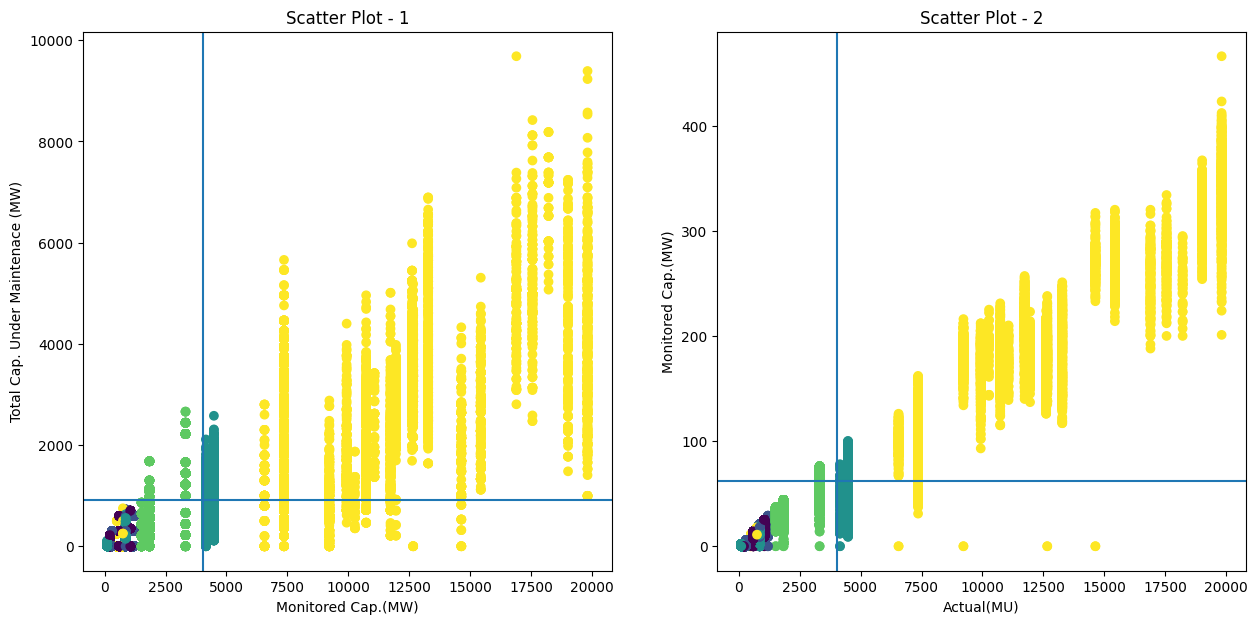

In [16]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15, 7))
ax[0].scatter(
    x = temp_df['Monitored Cap.(MW)'],
    y = temp_df['Total Cap. Under Maintenace (MW)'],
    c = encoder.fit_transform(temp_df['Power Station'])
)
ax[0].axhline(temp_df['Total Cap. Under Maintenace (MW)'].mean())
ax[0].axvline(temp_df['Monitored Cap.(MW)'].mean())
ax[0].set_title("Scatter Plot - 1")
ax[0].set_xlabel('Monitored Cap.(MW)')
ax[0].set_ylabel('Total Cap. Under Maintenace (MW)')

ax[1].scatter(
    x = temp_df['Monitored Cap.(MW)'],
    y = temp_df['Actual(MU)'],
    c = encoder.fit_transform(temp_df['Power Station'])
)
ax[1].axhline(temp_df['Actual(MU)'].mean())
ax[1].axvline(temp_df['Monitored Cap.(MW)'].mean())
ax[1].set_title("Scatter Plot - 2")
ax[1].set_xlabel('Actual(MU)')
ax[1].set_ylabel('Monitored Cap.(MW)')

### `Q-2` - Draw a 3D Scatter plot between "*Monitored Cap.(MW)*", "*Total Cap. Under Maintenace (MW)*" and "*Forced Maintanence(MW)*"

Text(0.5, 0, 'Forced Maintanence(MW)')

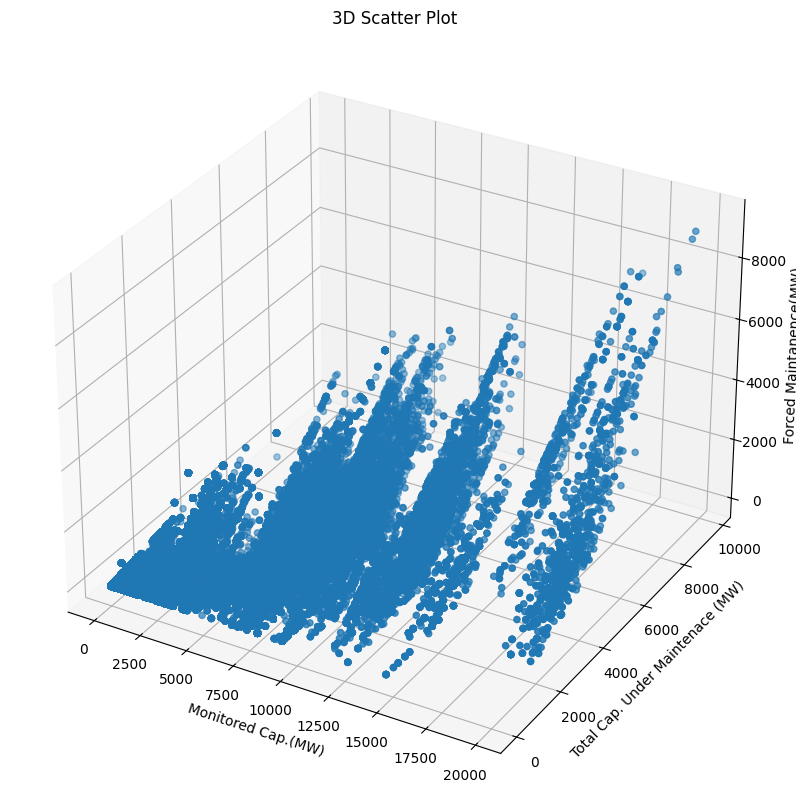

In [22]:
fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(projection = '3d')
ax.scatter3D(df['Monitored Cap.(MW)'], df['Total Cap. Under Maintenace (MW)'], df['Forced Maintanence(MW)'])
ax.set_title('3D Scatter Plot')
ax.set_xlabel('Monitored Cap.(MW)')
ax.set_ylabel('Total Cap. Under Maintenace (MW)')
ax.set_zlabel('Forced Maintanence(MW)')

### `Q-3` - Make a 3D *Surface* plot of this below mathematical equation. - `$$z = |x| - |y|$$`

Text(0.5, 0, 'z')

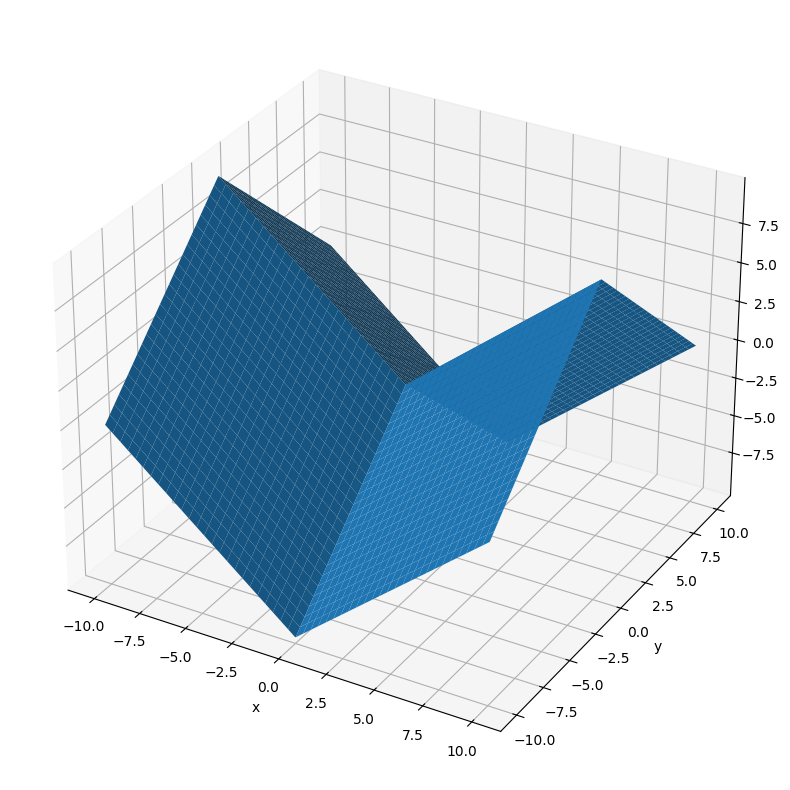

In [27]:
x = np.linspace(-10, 10, 500)
y = np.linspace(-10, 10, 500)

xx, yy = np.meshgrid(x, y)
z = np.abs(xx) - np.abs(yy)

fig = plt.figure(figsize = (10, 10))
ax = plt.subplot(projection = '3d')
ax.plot_surface(xx, yy, z)

ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

### `Q-4` - Draw the 3D *Contour plot* of this below equation - `$$z = |x| - |y|$$`

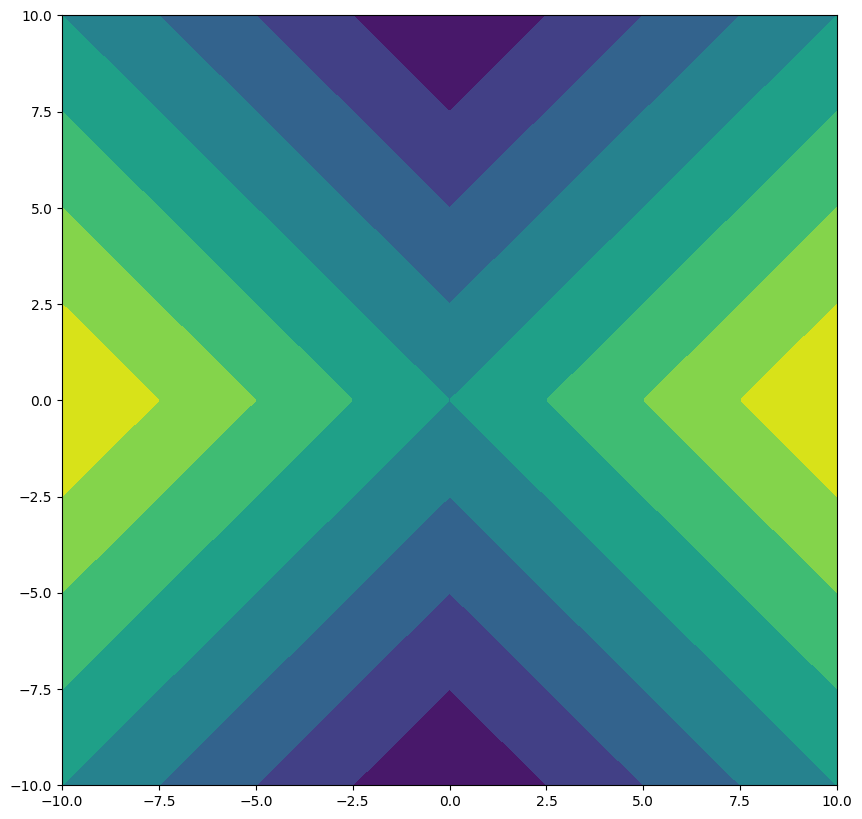

In [29]:
plt.figure(figsize = (10, 10))
plt.contourf(xx, yy, z)
plt.show()